In [2]:
import pandas as pd

# Load dataset (Make sure the file is uploaded in Colab)
from google.colab import files
uploaded = files.upload()

# Read the dataset
df = pd.read_csv("Admission_Predict.csv")

# Display basic info and first few rows
df.info(), df.head()


Saving Admission_Predict.csv to Admission_Predict.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


(None,
    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
 0           1        337          118                  4  4.5   4.5  9.65   
 1           2        324          107                  4  4.0   4.5  8.87   
 2           3        316          104                  3  3.0   3.5  8.00   
 3           4        322          110                  3  3.5   2.5  8.67   
 4           5        314          103                  2  2.0   3.0  8.21   
 
    Research  Chance of Admit   
 0         1              0.92  
 1         1              0.76  
 2         1              0.72  
 3         1              0.80  
 4         0              0.65  )

In [3]:
# Drop Serial No. column since it's just an index
df = df.drop(columns=["Serial No."])
df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# Compute summary statistics
summary_stats = df.describe().T

# Compute range separately
summary_stats["Range"] = summary_stats["max"] - summary_stats["min"]

# Compute percentiles
percentiles = df.quantile([0.25, 0.5, 0.75]).T
percentiles.columns = ["25th Percentile", "50th Percentile (Median)", "75th Percentile"]

# Combine all statistics
summary_stats = summary_stats.join(percentiles)
summary_stats


,count,mean,std,min,25%,50%,75%,max,Range,25th Percentile,50th Percentile (Median),75th Percentile
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00,50.00,308.00,317.00,325.0000
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00,28.00,103.00,107.00,112.0000
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00,4.00,2.00,3.00,4.0000
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00,4.00,2.50,3.50,4.0000
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00,4.00,3.00,3.50,4.0000
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92,3.12,8.17,8.61,9.0625
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00,1.00,0.00,1.00,1.0000
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97,0.63,0.64,0.73,0.8300


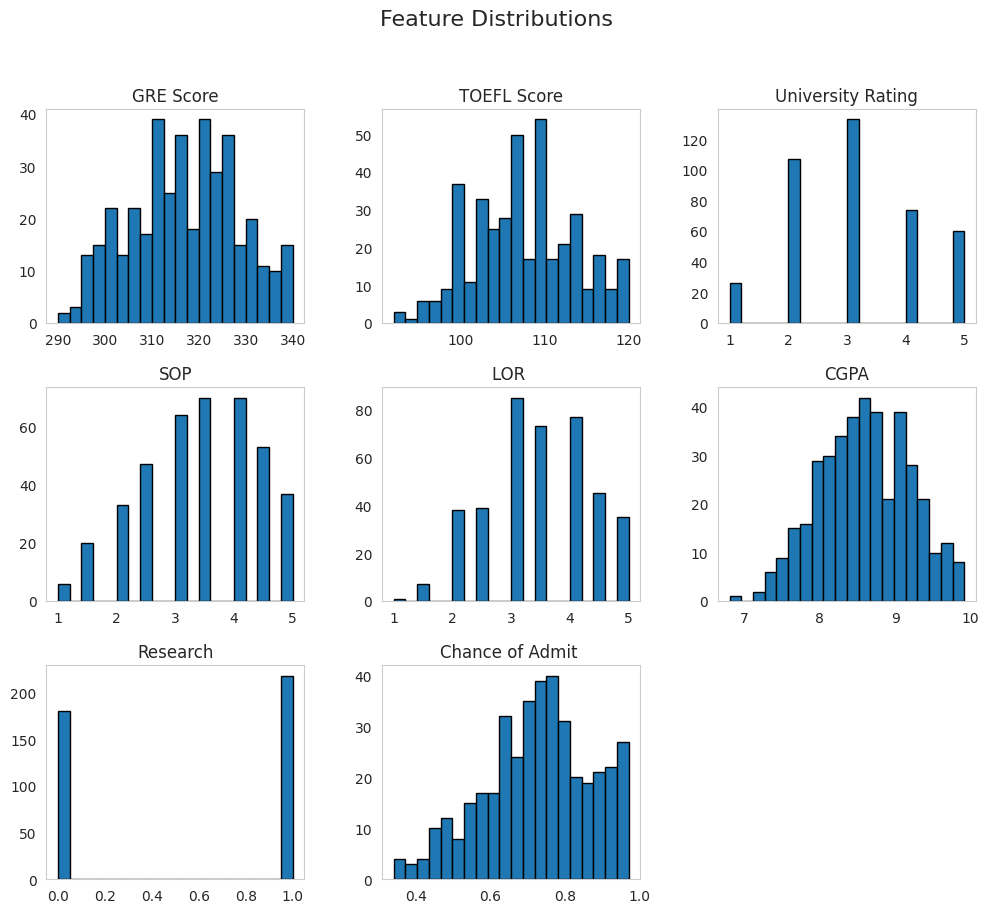

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot histograms for all numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black', grid=False)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [6]:
# Check for missing values
df.isnull().sum()


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
df.fillna(df.mean(), inplace=True)  # Replace NaN with column mean


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["GRE Score", "TOEFL Score", "CGPA"]] = scaler.fit_transform(df[["GRE Score", "TOEFL Score", "CGPA"]])

df.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,4,4.5,4.5,0.913462,1,0.92
1,0.68,0.535714,4,4.0,4.5,0.663462,1,0.76
2,0.52,0.428571,3,3.0,3.5,0.384615,1,0.72
3,0.64,0.642857,3,3.5,2.5,0.599359,1,0.80
4,0.48,0.392857,2,2.0,3.0,0.451923,0,0.65


In [12]:
# Check column names
print(df.columns)

# Strip any extra spaces from column names
df.columns = df.columns.str.strip()

# Try accessing the column again
print(df.columns)  # Verify column names

# Define a classification threshold (e.g., 0.75)
df["Admitted"] = (df["Chance of Admit"] >= 0.75).astype(int)

# Drop the original "Chance of Admit" column
df = df.drop(columns=["Chance of Admit"])

df.head()


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')
Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,0.94,0.928571,4,4.5,4.5,0.913462,1,1
1,0.68,0.535714,4,4.0,4.5,0.663462,1,1
2,0.52,0.428571,3,3.0,3.5,0.384615,1,0
3,0.64,0.642857,3,3.5,2.5,0.599359,1,1
4,0.48,0.392857,2,2.0,3.0,0.451923,0,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X = df.drop(columns=["Admitted"])  # Features
y = df["Admitted"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

